In [1]:
# Critical interplay  between  trait  mean  and  variation  for  2-strain  coexistence.   
# We plot the coexistence equilibrium frequency of strain 2 (intermediate shading), 
# as a function of (\beta, \Delta b) and (\gamma, \Delta \nu)
#set gamma_{ij} = gamma i.e. no variation in coinfection clearance rates

import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm
from matplotlib import colors

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [4]:
#Compute the values of pairwise invasion fitnesses acc. to clearance rate and variation in clearance rates
def resistance(gamm, del_gamm, k):
    R0 = beta/(gamm + r) 
    mu = 1/(k*(R0 - 1))
    theta2 = gamm/(2*(gamm + r))*mu*(2*mu + 1)/(mu + 1)**2
    theta4 = 1/2*(R0 - 1)*mu/(mu + 1)**2
    
    #lambda^2_1 + lambda^1_2
    summ = theta4*(alp[0,1] + alp[1,0] - alp[0,0] - alp[1,1])
    
    lambd12 = -del_b - theta2*del_gamm + theta4*(mu*(alp[0][1] - alp[1][0]) + alp[0][1] - alp[0][0])
    lambd21 = summ - lambd12
    
    return lambd21, lambd12, lambd12/summ #equilibrium of z_2

#Compute the values of pairwise invasion fitnesses acc. to transmission rate and variation in transmission rates
def resistance2(beta, del_b, k):
    R0 = beta/(gamm + r)
    mu = 1/(k*(R0 - 1))
    theta2 = gamm/(2*(gamm + r))*mu*(2*mu + 1)/(mu + 1)**2
    theta4 = 1/2*(R0 - 1)*mu/(mu + 1)**2
    
    #lambda^2_1 + lambda^1_2
    summ = theta4*(alp[0,1] + alp[1,0] - alp[0,0] - alp[1,1])
    lambd12 = -del_b - theta2*del_gamm + theta4*(mu*(alp[0][1] - alp[1][0]) + alp[0][1] - alp[0][0])
    lambd21 = summ - lambd12
    
    return lambd21, lambd12, lambd12/summ

def value(L21, L12, z): #Determine the outcome, pick only coexistence cases with the corresponding equilibrium of z_2
    pos1 = L21 > 0
    pos2 = L12 > 0
    neg1 = L21 < 0
    neg2 = L12 < 0

    coex = pos1*pos2
    bi = 1.01*neg1*neg2
    s2 =   1.01*pos2*neg1
    s1 = -0.01*pos1*neg2
    val = z*coex + s1 + s2 + bi
    return val

In [6]:
### COMPUTE EQUILIBRIUM ACC. TO MEAN AND VARIATION IN CLEARANCE RATE
# Set parameters
r = 0.3
alp = np.array([[0, np.sqrt(2)], [np.sqrt(2), 0]]) #variation in co-colonization interaction k_{ij}
beta = 5.3
del_b = 0.15
# Create meshgrid
X = np.linspace(0, 5, 2000)
Y = np.linspace(10, -10, 2000)
x1, y1 = np.meshgrid(X, Y)

#CASE 1: k = 1.5
L21, L12, z = resistance(x1, y1, 1.5)
val1 = value(L21, L12, z)

#CASE 2: k = 0.2
L21, L12, z = resistance(x1, y1, 0.2)
val2 = value(L21, L12, z)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less


In [8]:
### COMPUTE EQUILIBRIUM ACC. TO MEAN AND VARIATION IN TRANSMISSION RATE
# Set parameter of neutral system
gamm = 1
del_gamm = 1
# Create meshgrid
X = np.linspace(1.5, 9, 400)
Y = np.linspace(2, -2, 1000)
x2, y2 = np.meshgrid(X, Y)

#CASE 1: k = 1.5
L21, L12, z = resistance2(x2, y2, 1.5)
val3 = value(L21, L12, z)
#CASE 2: k = 0.2
L21, L12, z = resistance2(x2, y2, 0.2)
val4 = value(L21, L12, z)

Text(-0.1, 1.1, 'd')

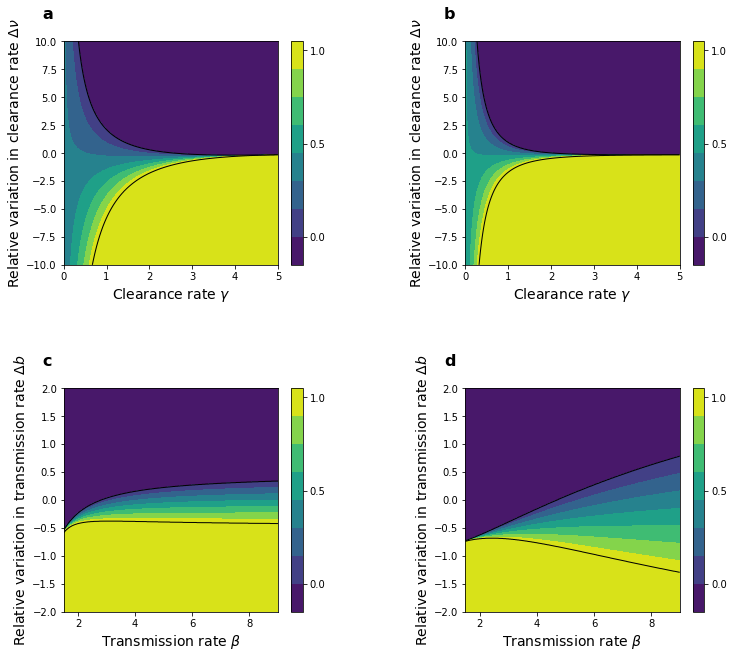

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 10.5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.55)

ax1.contour(x1, y1, val1, levels = [0, 1], colors=('k',),linestyles=('-',),linewidths=(1,))
m1 = ax1.contourf(x1, y1, val1)
ax1.set_ylabel('Relative variation in clearance rate $\Delta \\nu$', fontsize = 14)
ax1.set_xlabel('Clearance rate $\gamma$', fontsize = 14)
fig.colorbar(m1, ax = ax1, ticks=[0, 0.5 , 1])
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, size=16, weight='bold')

ax2.contour(x1, y1, val2, levels = [0, 1], colors=('k',),linestyles=('-',),linewidths=(1,))
m2 = ax2.contourf(x1, y1, val2)
ax2.set_ylabel('Relative variation in clearance rate $\Delta \\nu$', fontsize = 14)
ax2.set_xlabel('Clearance rate $\gamma$', fontsize = 14)
fig.colorbar(m2, ax = ax2 , ticks=[0, 0.5 , 1])
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, size=16, weight='bold')

ax3.contour(x2, y2, val3, levels = [0, 1], colors=('k',),linestyles=('-',),linewidths=(1,))
m3 = ax3.contourf(x2, y2, val3)
ax3.set_ylabel('Relative variation in transmission rate $\Delta b$', fontsize = 14)
ax3.set_xlabel('Transmission rate $\\beta$', fontsize = 14)
fig.colorbar(m3, ax = ax3, ticks=[0, 0.5 , 1])
ax3.text(-0.1, 1.1, 'c', transform=ax3.transAxes, size=16, weight='bold')

ax4.contour(x2, y2, val4 , levels = [0, 1], colors=('k',),linestyles=('-',),linewidths=(1,))
m4 = ax4.contourf(x2, y2, val4)
ax4.set_ylabel('Relative variation in transmission rate $\Delta b$', fontsize = 14)
ax4.set_xlabel('Transmission rate $\\beta$', fontsize = 14)
fig.colorbar(m4, ax = ax4, ticks=[0, 0.5 , 1])
ax4.text(-0.1, 1.1, 'd', transform=ax4.transAxes, size=16, weight='bold')